# Hypothesis Testing Exercises

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### steps to breakdown question (from Tyler)
- do I need to reword the question?
- what are the variables?
- what type are the variables?
- formulate null hypothesis
- formulate alt hypothesis
- example of True Positive
- example of True Negative
- example of Type 1 error (False Positive)
- example of Type 2 error (False Negative)
- what type of tests should I run?

#### Has the network latency gone up since we switched internet service providers?

- Null Hypothesis = $H_{0}$ = Network service/latency has no correlation to internet service providers
- Alternative Hypothesis = $H_{a}$ = Newtork service/latency has gone up since switching internet service providers
- True positive = if alpha > p and is established that internet service provider does impact network service/latency
- True negavite = if alpha < p and is established that internet service provider has no impact on network service/latency
- Type 1 error: if network service/latency is better with a internet service provider through data but realistically there is no impact
- Type 2 error: we don't reject that internet service has no impact on network latecny but there is significant impact

#### Is the website redesign any good?

- Null Hypothesis = $H_{0}$ = The number of click through's has actually not changed, meaning the redesign was not good
- Alternative Hypothesis = $H_{a}$ The number of click through's has risen since the redesign so the redesign is good
- True positive = Click through's are higher with the redesign
- True negavite = Click through's are lower with the redesign
- Type 1 error: Click through's are higher but not directly correlated to the redesign
- Type 2 error: The redesign does increase clickthrough's

#### Is our television ad driving more sales?

- Null Hypothesis = $H_{0}$ = The television ad does not drive more sales
- Alternative Hypothesis = $H_{a}$ = The television ad does drive more sales
- True positive = The television ad does increase the amount of sales
- True negavite = The television ad doesn't increase the amount of sales
- Type 1 error: The sales are up but not correlated to the television ad
- Type 2 error: The sales aren't up but because of customer's not buying regardless if the television ad reached more people

# T-test Exercises

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [3]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
alpha = 0.05

In [24]:
stats.ttest_ind_from_stats()

TypeError: ttest_ind_from_stats() missing 6 required positional arguments: 'mean1', 'std1', 'nobs1', 'mean2', 'std2', and 'nobs2'

In [2]:
# Using Scipy 
α = 0.05
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var= False)
t,p

(-2.7091418459143854, 0.00811206270346016)

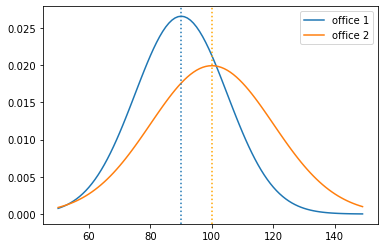

In [3]:
# Visualize two distribution:

x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)


plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

#### Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [7]:
mpg = data('mpg')

In [8]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [9]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

<AxesSubplot:>

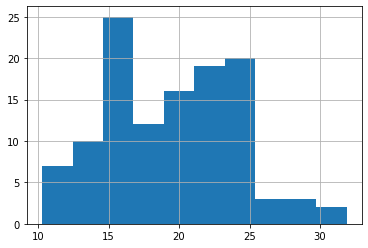

In [10]:
# plot distribution for fe_2008
fe_2008.hist()

<AxesSubplot:>

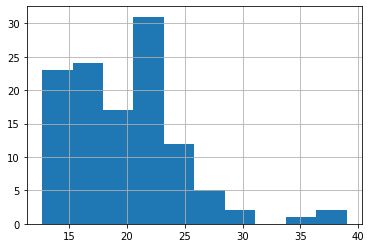

In [11]:
# plot distribution for fe_1999
fe_1999.hist()

In [12]:
t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [13]:
print(f'''
Because p ({p:.3f}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.
''')


Because p (0.764) > alpha (.05), we fail to reject the null hypothesis that there is no difference in fuel-efficency in cars from 2008 and 1999.



Are compact cars more fuel-efficient than the average car?

In [14]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

In [15]:
t, p = stats.ttest_1samp(fe_compact, μ)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [23]:
print(f'''
Because p/2 ({p/2:.12f}) < alpha (.05), we reject the null hypothesis that there is no difference in fuel-efficiency between compact cars and the overall average.
''')


Because p/2 (0.000007990351) < alpha (.05), we reject the null hypothesis that there is no difference in fuel-efficiency between compact cars and the overall average.



Do manual cars get better gas mileage than automatic cars?

In [17]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

<AxesSubplot:>

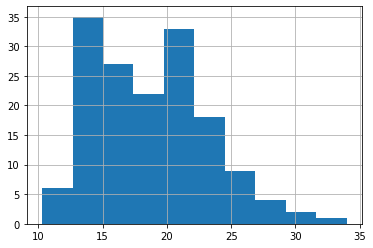

In [18]:
fe_auto.hist()

<AxesSubplot:>

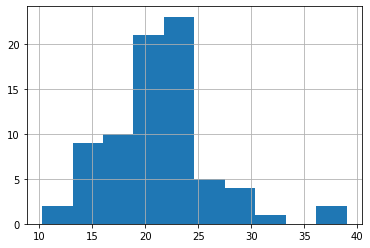

In [19]:
fe_manual.hist()

In [20]:
fe_auto.var(), fe_manual.var()

(20.428279095002054, 25.665633639828275)

In [21]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var = False)
t, p/2, alpha

(4.47444321386703, 7.99035135103976e-06, 0.05)

In [22]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars
''')


Because p/2 (0.000008) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars



# Correlation Exercises

In [1]:
import env

In [4]:
url = "https://gist.githubusercontent.com/ryanorsinger/3fce5a65b5fb8ab728af5192c7de857e/raw/a0422b7b73749842611742a1064e99088a47917d/clean_telco.csv"
df = pd.read_csv(url, index_col="id")
df.head(4).T

id,0,1,2,3
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF
gender,Female,Male,Male,Male
is_senior_citizen,0,0,0,1
partner,Yes,No,No,Yes
dependents,Yes,No,No,No
phone_service,1,2,1,1
internet_service,1,1,2,2
contract_int,1,0,0,0
payment_type,Mailed check,Mailed check,Electronic check,Electronic check
monthly_charges,65.6,59.9,73.9,98


1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [5]:
corr, p = stats.pearsonr(df.tenure_month, df.monthly_charges)
corr, p

(0.2460222267886157, 1.8834273042643495e-97)

Because P < alpha we can reject the null hypothesis that monthly charges and tenure do not have a linear correlation

In [7]:
corr, p = stats.pearsonr(df.tenure_month, df.total_charges)
corr, p

(0.8257328669183063, 0.0)

Because P (0.0) < alpha we can reject the null hypothesis that total charges and tenure do not have a linear correlation

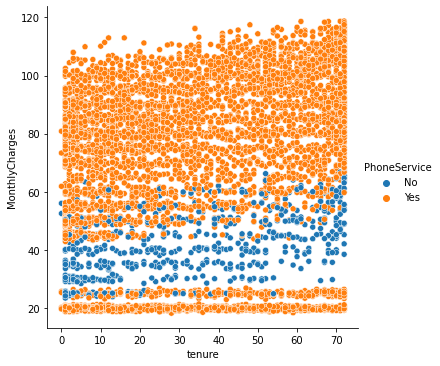

In [10]:
df = pd.read_csv('Cust_churn_Telco.csv')
sns.relplot(x='tenure', y='MonthlyCharges', hue='PhoneService', data=df)

In [11]:
x_phone_tenure = df['tenure'][df['PhoneService'] == 'Yes']
x_phone_totalcharges = df['TotalCharges'][df['PhoneService'] == 'Yes']
y_phone_monthlycharges = df['MonthlyCharges'][df['PhoneService'] == 'Yes']

In [13]:
x_no_phone_tenure = df['tenure'][df['PhoneService'] == 'No']
x_no_phone_totalcharges = df['TotalCharges'][df['PhoneService'] == 'No']
y_no_phone_monthlycharges = df['MonthlyCharges'][df['PhoneService'] == 'No']

In [15]:
r, p = stats.pearsonr(x_phone_tenure, y_phone_monthlycharges)
r, p

(0.24538898585362878, 7.117871077967264e-88)

In [16]:
r, p = stats.pearsonr(x_no_phone_tenure, y_no_phone_monthlycharges)
r, p

(0.5857597986661367, 4.6033703473423134e-64)

We can reject the null hypothesis since our p value on both is less than our alpha

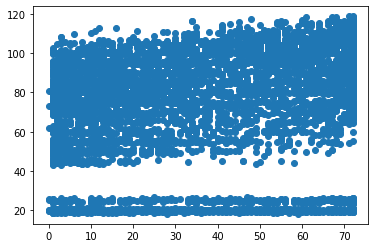

In [17]:
plt.scatter(x_phone_tenure, y_phone_monthlycharges)

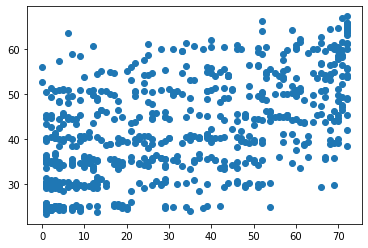

In [18]:
plt.scatter(x_no_phone_tenure, y_no_phone_monthlycharges)

In [19]:
df['InternetService'] = 'Internet Service : ' + df['InternetService']
df['PhoneService'] = 'Phone Service : ' + df['PhoneService']
df['Internet_and_Phone'] = df['InternetService'] + ' ' +df['PhoneService']

In [20]:
df['Internet_and_Phone'].value_counts()

Internet Service : Fiber optic Phone Service : Yes    3096
Internet Service : DSL Phone Service : Yes            1739
Internet Service : No Phone Service : Yes             1526
Internet Service : DSL Phone Service : No              682
Name: Internet_and_Phone, dtype: int64

In [22]:
x = {}
y = {}
control = ['InternetService', 'PhoneService', 'Internet_and_Phone']
for cntrl in control:
    for val in df[cntrl].unique():
        x[val] = {}
        y[val] = {}
        x[val]['tenure'] = df['tenure'][df[cntrl] == val]
        y[val]['TotalCharges'] = df['TotalCharges'][df[cntrl] == val]
        y[val]['MonthlyCharges'] = df['MonthlyCharges'][df[cntrl] == val]

2. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?